In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn

module_path = os.path.abspath(os.path.join('../../py-conjugated/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import network_utils as nuts

In [3]:
device_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/OPV_device_df.xlsx')
print(device_df.shape)
total_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/OPV_total_df.xlsx')
print(total_df.shape)

(366, 11)
(36, 60)


In [4]:
total_df.head()

,Unnamed: 0,Anneal_time,Anneal_temp,Substrate,Device,p1_fraction,p2_fraction,p3_fraction,p1_area_avg,p1_area_stdev,...,p3_Ecc_avg,p3_Ecc_stdev,p3_Orient_avg,p3_Orient_stdev,p3_Perim_avg,p3_Perim_stdev,PCE,VocL,Jsc,FF
0,0,15,100,4,2,0.377864,0.397964,0.224172,138.756250,515.165733,...,0.806425,0.141707,-0.028958,1.145651,27.843437,33.295642,2.311387,0.577792,6.963861,57.44484
1,1,15,100,4,4,0.350601,0.368873,0.280526,78.978947,180.249005,...,0.817408,0.147199,0.053783,1.171795,42.334954,73.576430,1.763230,0.522596,7.047848,47.87256
2,2,15,100,4,7,0.290203,0.329655,0.380142,122.638743,246.651556,...,0.840800,0.129785,-0.158463,1.160457,42.913004,88.566792,2.394418,0.575790,6.939877,59.92170
3,3,30,100,7,2,0.255200,0.437277,0.307523,151.263158,607.110300,...,0.836830,0.122449,-0.486800,0.858037,34.541492,46.688722,2.628197,0.569525,7.301575,63.20169
4,4,30,100,7,4,0.363801,0.396645,0.239554,151.330935,441.730661,...,0.817914,0.131814,-0.111498,1.075222,29.762502,28.652323,2.710602,0.568631,7.328048,65.04993


In [5]:
test_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/normed_OPV_test.xlsx')
train_df = pd.read_excel('/Users/wesleytatum/Desktop/py-conjugated/data/normed_OPV_train.xlsx')
test_df

,Unnamed: 0,Anneal_temp,Anneal_time,Device,FF,Jsc,PCE,Substrate,VocL,p1_Ecc_avg,...,p3_Orient_stdev,p3_Perim_avg,p3_Perim_stdev,p3_area_avg,p3_area_stdev,p3_extent_avg,p3_extent_stdev,p3_filled_area_avg,p3_filled_area_stdev,p3_fraction
0,25,175,15,3,0.909801,0.734816,0.757737,4,0.869393,0.280982,...,0.680864,0.771321,0.391287,0.579239,0.345826,0.182720,0.483376,0.574514,0.327855,0.680201
1,18,125,5,6,0.938871,0.923073,0.911244,1,0.806521,0.413870,...,0.651856,0.351606,0.061201,0.259887,0.078107,0.782412,0.298828,0.257329,0.072969,0.102921
2,5,100,30,7,0.919421,0.993903,0.960996,7,0.806653,0.321180,...,0.312428,0.755107,0.750574,0.633830,0.855980,0.234678,0.580329,0.633682,0.822952,1.000000
3,23,150,5,7,1.000000,0.935089,0.998002,1,0.818655,0.077712,...,0.685357,0.238873,0.000000,0.158390,0.018924,0.791579,0.232388,0.156827,0.016847,0.000000
4,14,125,30,3,0.970085,0.922020,0.967129,8,0.829387,0.468122,...,0.601669,0.443481,0.093211,0.365298,0.127393,0.959475,0.400562,0.361884,0.119575,0.291165
5,4,100,30,4,0.931212,1.000000,0.977002,7,0.804766,0.322697,...,0.653533,0.434879,0.148635,0.327479,0.151895,0.715372,0.361440,0.324518,0.143133,0.127534
6,24,175,15,2,0.919732,0.743203,0.773964,4,0.868509,0.217095,...,0.624804,0.524621,0.263885,0.397089,0.266198,0.634654,0.540690,0.393811,0.251395,0.292509
7,31,175,5,3,0.624706,0.833563,0.539616,2,0.794866,0.226173,...,0.581042,0.412252,0.178283,0.282078,0.148567,0.509394,0.224081,0.279794,0.140213,0.373414
8,9,125,15,1,0.984536,0.949012,0.979952,4,0.804497,0.160606,...,0.666090,0.459890,0.242297,0.341929,0.239258,0.694837,0.407666,0.342667,0.241806,0.162937
9,26,175,15,7,0.915455,0.725444,0.750862,4,0.867245,0.500868,...,0.620199,0.537601,0.302720,0.424315,0.320218,0.597974,0.460736,0.420291,0.303666,0.308548


In [16]:
test_set_key_dict = {
    0 : {'temp' : 175, 'time' : 15, 'sub' : 4, 'dev' : 3},
    1 : {'temp' : 125, 'time' : 5, 'sub' : 1, 'dev' : 6},
    2 : {'temp' : 100, 'time' : 30, 'sub' : 7, 'dev' : 7},
    3 : {'temp' : 150, 'time' : 5, 'sub' : 1, 'dev' : 7},
    4 : {'temp' : 125, 'time' : 30, 'sub' : 8, 'dev' : 3},
    5 : {'temp' : 100, 'time' : 30, 'sub' : 7, 'dev' : 4},
    6 : {'temp' : 175, 'time' : 15, 'sub' : 4, 'dev' : 2},
    7 : {'temp' : 175, 'time' : 5, 'sub' : 2, 'dev' : 3},
    8 : {'temp' : 125, 'time' : 15, 'sub' : 4, 'dev' : 1},
    9 : {'temp' : 175, 'time' : 15, 'sub' : 4, 'dev' : 7},
}

label_df = pd.DataFrame.from_dict(test_set_key_dict, orient = 'index')

In [23]:
sample_indexs = []
    
for i, row in label_df.iterrows():

    #query for sample labels that = test set identifiers
    time_matches = total_df[total_df['Anneal_temp'] == row[0]]
#     print(time_matches.shape)
    temp_matches = time_matches.query('Anneal_time == @row[1]')
#     print(temp_matches.shape)
    sub_matches = temp_matches.query('Substrate == @row[2]')
#     print(sub_matches.shape)
    matches = sub_matches.query('Device == @row[3]')
    print(matches.shape)

    if len(matches) > 0:
        #append index of match to test_sample_idxs
        match_idxs = matches.index[:].tolist()
        sample_indexs.append(match_idxs[0])

    else:
        pass
    
print(len(sample_indexs))

(1, 60)
(1, 60)
(1, 60)
(1, 60)
(2, 60)
(1, 60)
(1, 60)
(2, 60)
(1, 60)
(1, 60)
10


In [40]:
pce = []
voc = []
jsc = []
ff = []
indxs = []

for indx in sample_indexs:
    row = total_df[total_df['Unnamed: 0'] == indx]
    
    pce.append(row['PCE'].item())
    voc.append(row['VocL'].item())
    jsc.append(row['Jsc'].item())
    ff.append(row['FF'].item())
    indxs.append(row['Unnamed: 0'].item())
    
label_df['PCE'] = pce
label_df['Vocl'] = voc
label_df['Jsc'] = jsc
label_df['FF'] = ff
label_df['Index'] = indxs

label_df

,temp,time,sub,dev,PCE,Vocl,Jsc,FF,Index
0,175,15,4,3,2.102272,0.614295,5.384771,63.554230,25
1,125,5,1,6,2.528163,0.569871,6.764324,65.584951,18
2,100,30,7,7,2.666194,0.569964,7.283368,64.226210,5
3,150,5,1,7,2.768863,0.578445,6.852381,69.855093,23
4,125,30,8,3,2.683210,0.586028,6.756608,67.765392,14
5,100,30,7,4,2.710602,0.568631,7.328048,65.049930,4
6,175,15,4,2,2.147290,0.613671,5.446227,64.247983,24
7,175,5,2,3,1.497115,0.561636,6.108392,43.638870,30
8,125,15,4,1,2.718786,0.568441,6.954402,68.774878,9
9,175,15,4,7,2.083196,0.612777,5.316091,63.949188,26


In [10]:
train_data_path = '/Volumes/Tatum_SSD-1/Grad_School/m2py/Morphology_labels/OPV_morph_maps/train_set/'
train_save_path = '/Users/wesleytatum/Desktop/py-conjugated/py-conjugated_Github/py-conjugated/data/OPV_train_set.zip'
print(os.path.isdir(train_data_path))

train_dataset = nuts.local_OPV_ImDataset(train_data_path)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = 13)

True


In [17]:
for x in train_dataloader:
    print(x[0].shape)

torch.Size([13, 1, 2, 256, 256])
torch.Size([13, 1, 2, 256, 256])


In [19]:
# torch.save(train_dataloader, train_save_path)

In [6]:
test_data_path = '/Volumes/Tatum_SSD-1/Grad_School/m2py/Morphology_labels/OPV_morph_maps/test_set/'
test_save_path = '/Users/wesleytatum/Desktop/py-conjugated/py-conjugated_Github/py-conjugated/data/OPV_test_set.zip'
print(os.path.isdir(test_data_path))

test_dataset = nuts.local_OPV_ImDataset(test_data_path)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size = 10)

# torch.save(test_dataset, test_save_path)

True


In [24]:
test = torch.utils.data.DataSet(train_save_path, batch_size = 13)

In [26]:
for x in test:
    print(x)

['/', 'U', 's', 'e', 'r', 's', '/', 'w', 'e', 's', 'l', 'e', 'y']
['t', 'a', 't', 'u', 'm', '/', 'D', 'e', 's', 'k', 't', 'o', 'p']
['/', 'p', 'y', '-', 'c', 'o', 'n', 'j', 'u', 'g', 'a', 't', 'e']
['d', '/', 'p', 'y', '-', 'c', 'o', 'n', 'j', 'u', 'g', 'a', 't']
['e', 'd', '_', 'G', 'i', 't', 'h', 'u', 'b', '/', 'p', 'y', '-']
['c', 'o', 'n', 'j', 'u', 'g', 'a', 't', 'e', 'd', '/', 's', 'a']
['g', 'e', 'm', 'a', 'k', 'e', 'r', '/', 'd', 'a', 't', 'a', '_']
['l', 'o', 'a', 'd', 'e', 'r', 's', '/', 't', 'r', 'a', 'i', 'n']
['_', 'd', 'a', 't', 'a', 'l', 'o', 'a', 'd', 'e', 'r', '.', 'p']
['t', 'h']


In [17]:
from zipfile import ZipFile 

file_paths = os.listdir(test_data_path)

with ZipFile(test_save_path,'w') as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(test_data_path + file) 

In [20]:
file_paths = os.listdir(train_data_path)

with ZipFile(train_save_path,'w') as zip: 
        # writing each file one by one 
        for file in file_paths: 
            zip.write(train_data_path + file) 

In [18]:
test = np.load('../../data/OPV_test_set.zip')

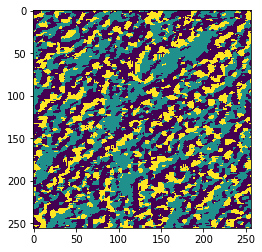

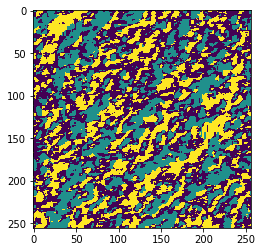

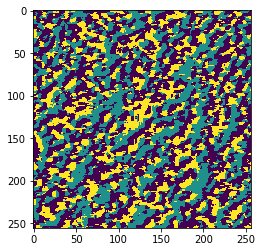

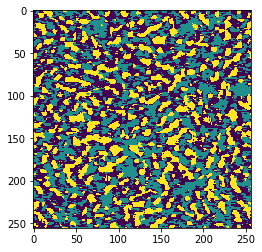

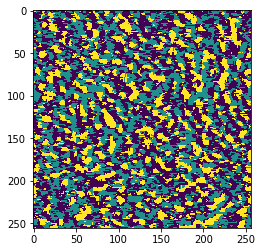

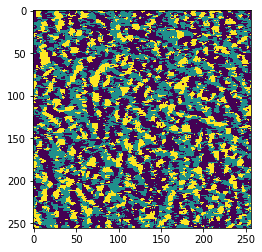

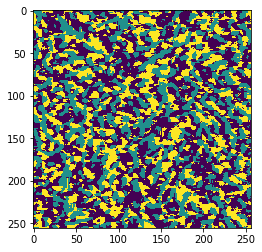

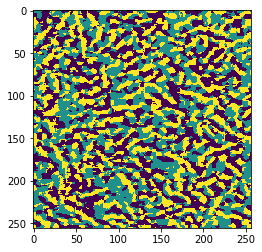

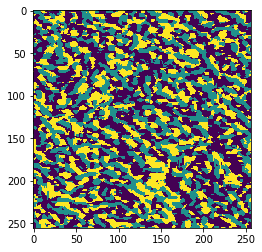

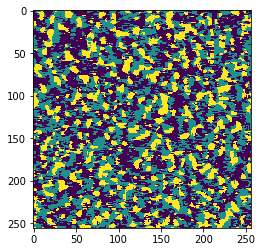

In [25]:
for fl in test.files:
    im = (test[fl])
    plt.imshow(im[:,:,0])
    plt.show()